In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [169]:
# load package for loading data
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt



In [170]:
# Load the dataset
file_path = 'data/boston_housing.csv'
housing_dataset = pd.read_csv(file_path)
print(housing_dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [171]:
X = housing_dataset['RM'].values.reshape(-1,1)
y = housing_dataset['MEDV'].values

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 354, Testing set size: 152


### Data Visualization

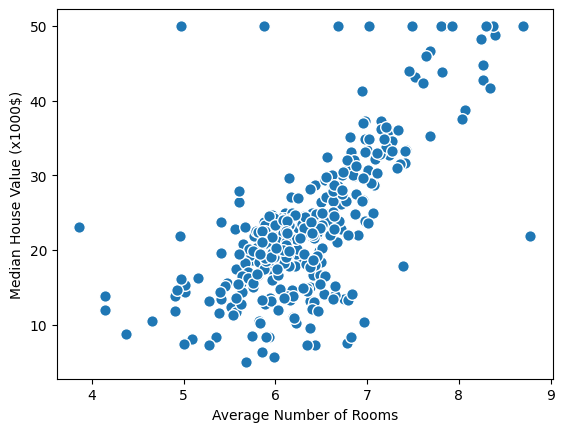

In [173]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
# plt.xlabel('...')
# plt.ylabel('...')
plt.show()

### Linear Regression (Base)

In [174]:

class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

    def fit(self, X, y):
        pass


### Gradient Descent

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

In [176]:
class GradientDescent:
    def __init__(self, eta=0.001, max_iter=200, random_state=42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None  # Weight initialization will happen in fit method
        self.costs = []

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Include bias term

        self.costs = []
        for iter_i in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred

            self.w[0] += self.eta * np.sum(diff)  # Update intercept
            self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coefficients
            J = 1 / 2 * np.sum(diff ** 2)  # Compute cost value
            self.costs.append(J)

    def predict(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-176-d1bc063fee6c>:20: RuntimeWarning: overflow encountered in square
  J = 1 / 2 * np.sum(diff ** 2)  # Compute cost value
<ipython-input-176-d1bc063fee6c>:18: RuntimeWarning: invalid value encountered in scalar add
  self.w[0] += self.eta * np.sum(diff)  # Update intercept
<ipython-input-176-d1bc063fee6c>:19: RuntimeWarning: invalid value encountered in add
  self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coefficients


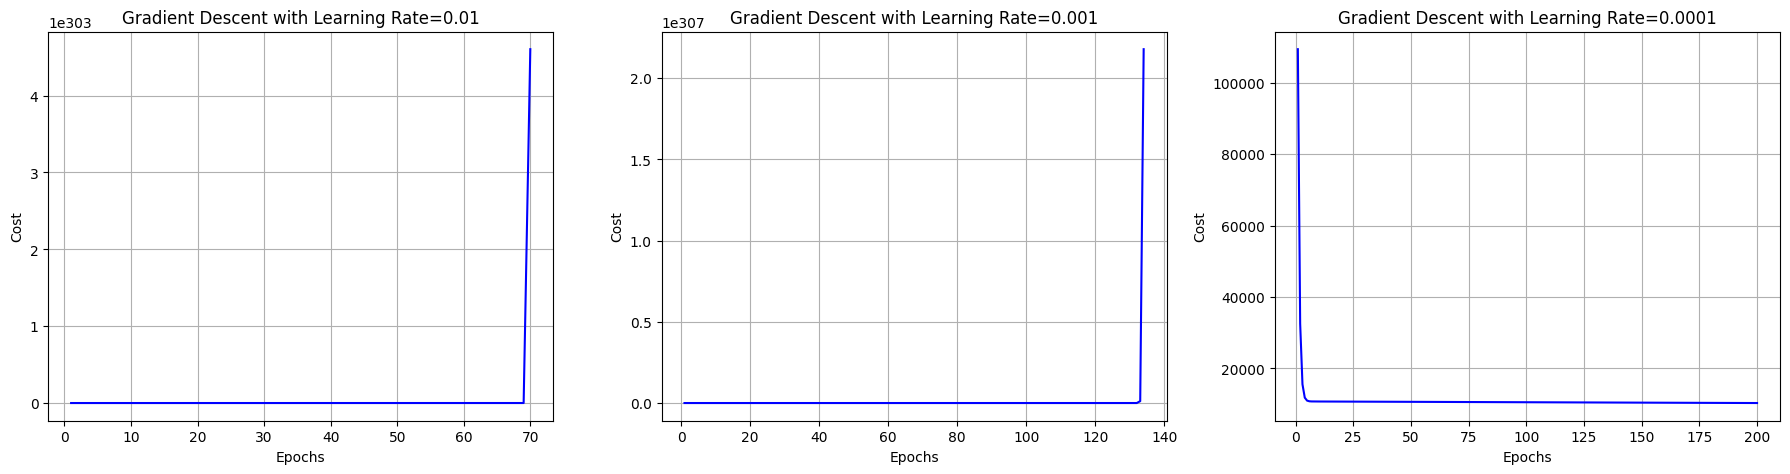

In [177]:
learning_rates = [1e-2, 1e-3, 1e-4]

# Create a figure with subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, eta in enumerate(learning_rates):
    reg_GD = GradientDescent(eta=eta, max_iter=200, random_state=42)

    # Train model
    reg_GD.fit(X_train, y_train)

    axs[i].plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, color='b')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Cost')
    axs[i].set_title(f'Gradient Descent with Learning Rate={eta}')
    axs[i].grid()

plt.tight_layout()
plt.show()

From this analysis, 1e-4 is the most suitable learning rate.

Visualize the prediction of Gradient Descent model on Training Data

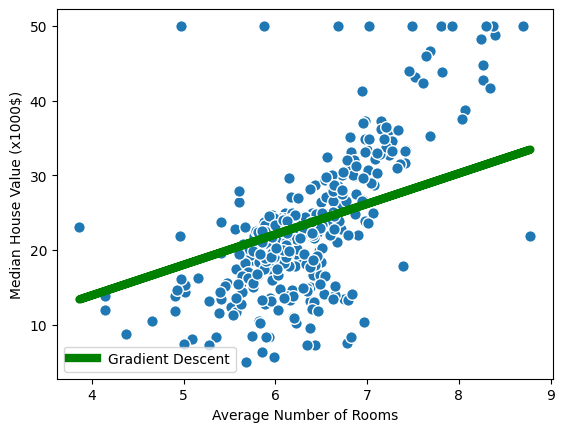

In [178]:
# Initialize the model
reg_GD = GradientDescent( eta = 1e-4, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [179]:
from sklearn.linear_model import SGDRegressor
X = housing_dataset[['RM']]  # Average number of rooms
y = housing_dataset['MEDV']   # Median house value

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [180]:
# Initialize the model
reg_SGD = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=200, random_state=42)
# Train model
reg_SGD.fit(X_train, y_train)


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

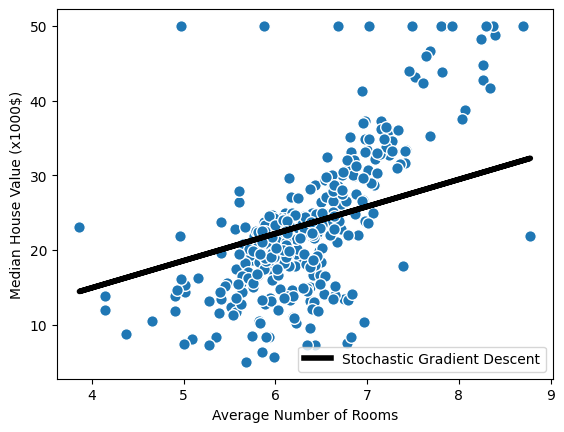

In [181]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
# Intialize the Normal Equation model
reg_NE =LinearRegression()

# Train model
reg_NE.fit(X_train,y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

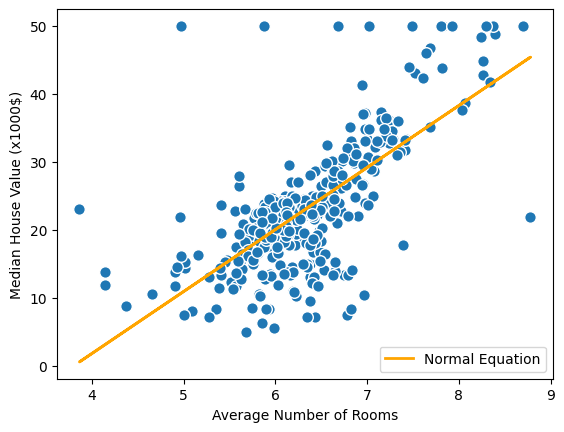

In [184]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

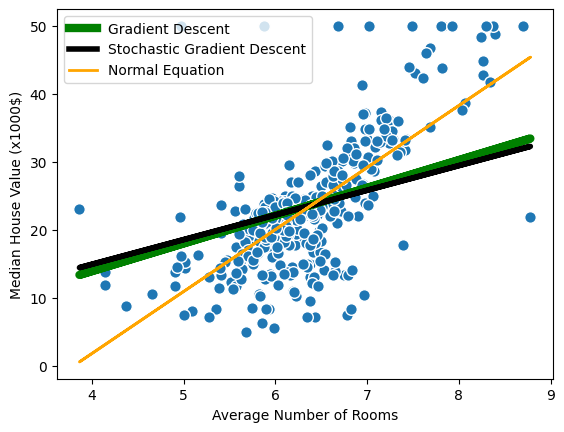

In [185]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [186]:

w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_,reg_SGD.coef_)
w_NE = np.append(reg_SGD.intercept_,reg_SGD.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[0.42267533 3.62760358]
[0.42267533 3.62760358]


Performance Comparisons (on Testing Set)

In [187]:
y_pred_GD = reg_GD.predict(X_test)

In [188]:
y_pred_SGD = reg_SGD.predict(X_test)

In [189]:
y_pred_NE = reg_NE.predict(X_test)

In [190]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [191]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.387474
MAE of NE: 4.314224


In [192]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 54.538412
MSE of NE: 40.35145


In [193]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.268069
R2 of NE: 0.458465


## Experiment with Standardized Data

In [194]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/boston_housing.csv'
housing_dataset = pd.read_csv(file_path)

# Show the first few rows of the dataset
print(housing_dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [195]:
X = housing_dataset['RM']
y = housing_dataset['MEDV']

In [196]:
# Standardize the features (X)
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])


In [197]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]  # RM column as input features
print(X_new)
y = housing_dataset['MEDV']  # MEDV column as the target variable

           RM
0    0.413672
1    0.194274
2    1.282714
3    1.016303
4    1.228577
..        ...
501  0.439316
502 -0.234548
503  0.984960
504  0.725672
505 -0.362767

[506 rows x 1 columns]


In [198]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

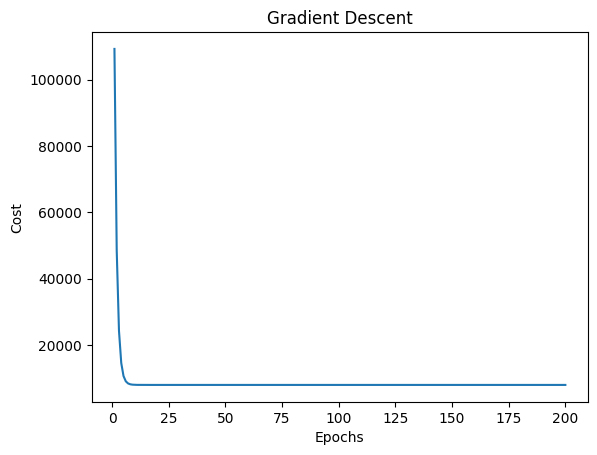

In [199]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent( eta = 1e-3, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



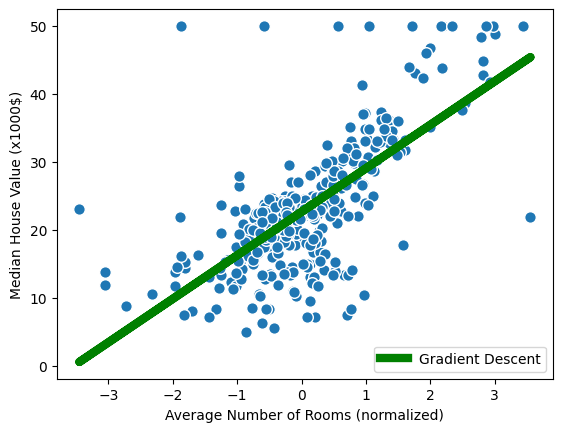

In [200]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [201]:
# Initialize the Stochastic Gradient Descent model
eta0 = 1e-3
max_iter = 200
reg_SGD = SGDRegressor(learning_rate='constant', eta0=eta0, max_iter=max_iter, random_state=42)

# Train the SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


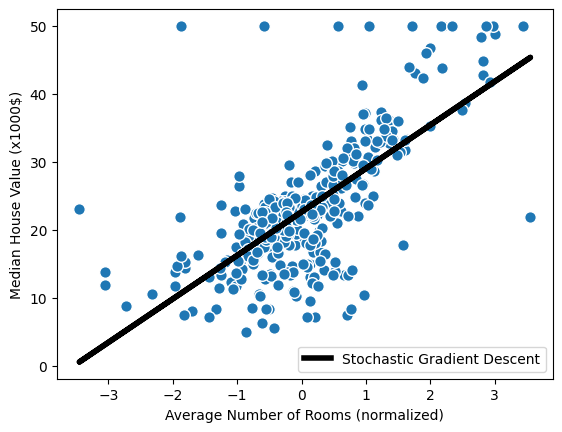

In [202]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [203]:
# Initialize the Normal Equation model
reg_NE = LinearRegression()
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

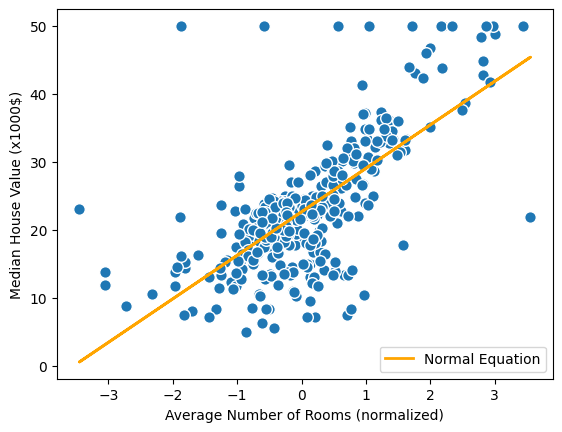

In [204]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

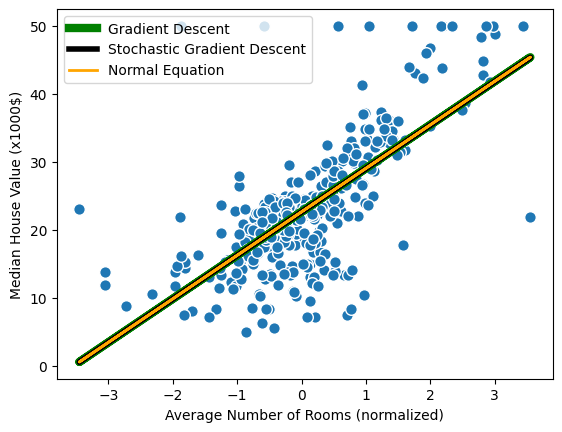

In [205]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [206]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [207]:
w_SGD = np.append(reg_SGD.intercept_,reg_SGD.coef_)
w_SGD

array([22.62083926,  6.39567675])

In [208]:
w_NE = np.append(reg_NE.intercept_,reg_NE.coef_)
w_NE

array([22.64163118,  6.40020122])

In [209]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [210]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [211]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [212]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [213]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.312817
MAE of NE: 4.314224


In [214]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.336472
MSE of NE: 40.35145


In [215]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.458666
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [216]:
# Re-load dataset
housing_dataset = pd.read_csv('data/boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [217]:
X_n = housing_dataset.drop(columns=['MEDV']).values
y = housing_dataset['MEDV'].values

In [218]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

<ipython-input-176-d1bc063fee6c>:20: RuntimeWarning: overflow encountered in square
  J = 1 / 2 * np.sum(diff ** 2)  # Compute cost value
<ipython-input-176-d1bc063fee6c>:19: RuntimeWarning: invalid value encountered in add
  self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coefficients
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


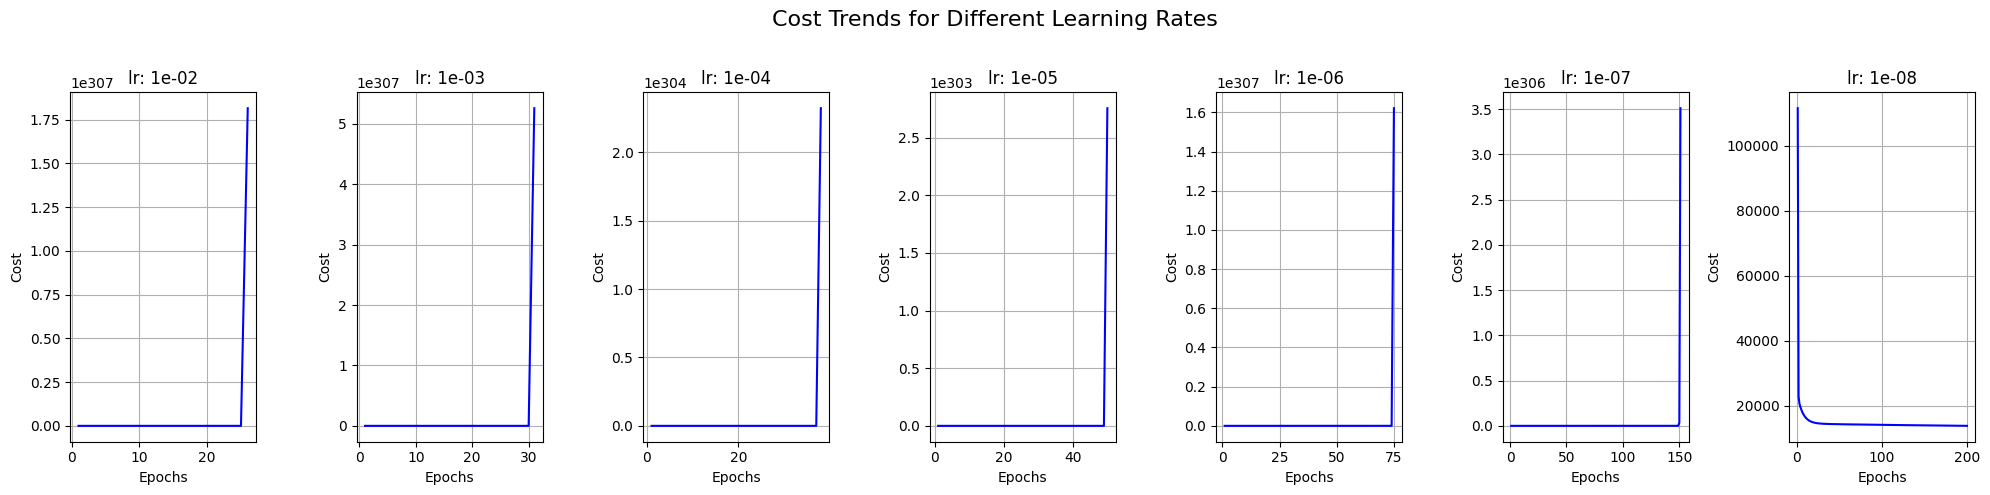

In [219]:
import matplotlib.pyplot as plt

# Define the learning rates
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

fig, axs = plt.subplots(1, 7, figsize=(20, 5))

for i, eta in enumerate(learning_rates):
    # Initialize the model
    reg_GD = GradientDescent(eta=eta, max_iter=200, random_state=42)

    # Train model
    reg_GD.fit(X_train, y_train)


    axs[i].plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, color='b')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Cost')
    axs[i].set_title(f'lr: {eta:.0e}')  # Formatting for scientific notation
    axs[i].grid()

plt.suptitle('Cost Trends for Different Learning Rates', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle

plt.show()


From this analysis, 1e-8 is the most suitable learning rate for this
 model.


In [220]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent( eta = 1e-8, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train, y_train)

### Stochastic Gradient Descent

In [221]:
# Initialize the SGD model
reg_SGD = SGDRegressor(eta0=1e-3, max_iter=200, random_state=42, learning_rate ='constant')

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation

In [222]:
# Add the '1' column to data
ones_col = np.ones((len(X_train), 1))
X_train_new = np.concatenate((ones_col, X_train), axis=1)

ones_col = np.ones((len(X_test), 1))
X_test_new = np.concatenate((ones_col, X_test), axis=1)

# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_new, y_train)

LinearRegression()

### Algorithms Comparisons

In [223]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [224]:
w_SGD = np.append(reg_SGD.intercept_,reg_SGD.coef_)
w_SGD

array([ 1.33516942e+09, -2.63436169e+11, -3.63663427e+10, -4.24299481e+10,
        2.13199543e+10, -9.82996754e+08, -1.80783008e+10,  3.60362731e+11,
       -9.07175676e+08,  4.34363997e+10, -5.40027977e+11,  1.27324836e+11,
       -2.51287550e+11,  2.92847579e+11])

In [225]:
w_NE = np.append(reg_NE.intercept_,reg_NE.coef_)
w_NE

array([ 3.16310840e+01,  0.00000000e+00, -1.33470103e-01,  3.58089136e-02,
        4.95226452e-02,  3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
       -1.08208352e-02, -1.38599824e+00,  2.42727340e-01, -8.70223437e-03,
       -9.10685208e-01,  1.17941159e-02, -5.47113313e-01])

In [226]:
y_pred_GD = reg_GD.predict(X_test)

In [227]:
y_pred_SGD = reg_SGD.predict(X_test)

In [228]:
y_pred_NE = reg_NE.predict(X_test_new)

In [229]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 280638729923058.1
MAE of NE: 3.16271


In [230]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 8.484744770779695e+28
MSE of NE: 21.517444


In [231]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: -1.1386917569478417e+27
R2 of NE: 0.711226


## Experiment with Standardized Data

In [232]:
# Re-load dataset
housing_dataset = pd.read_csv('data/boston_housing.csv')

In [233]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [234]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [235]:
X_new = housing_dataset.drop(columns=['MEDV']).values
y = housing_dataset['MEDV'].values

In [236]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

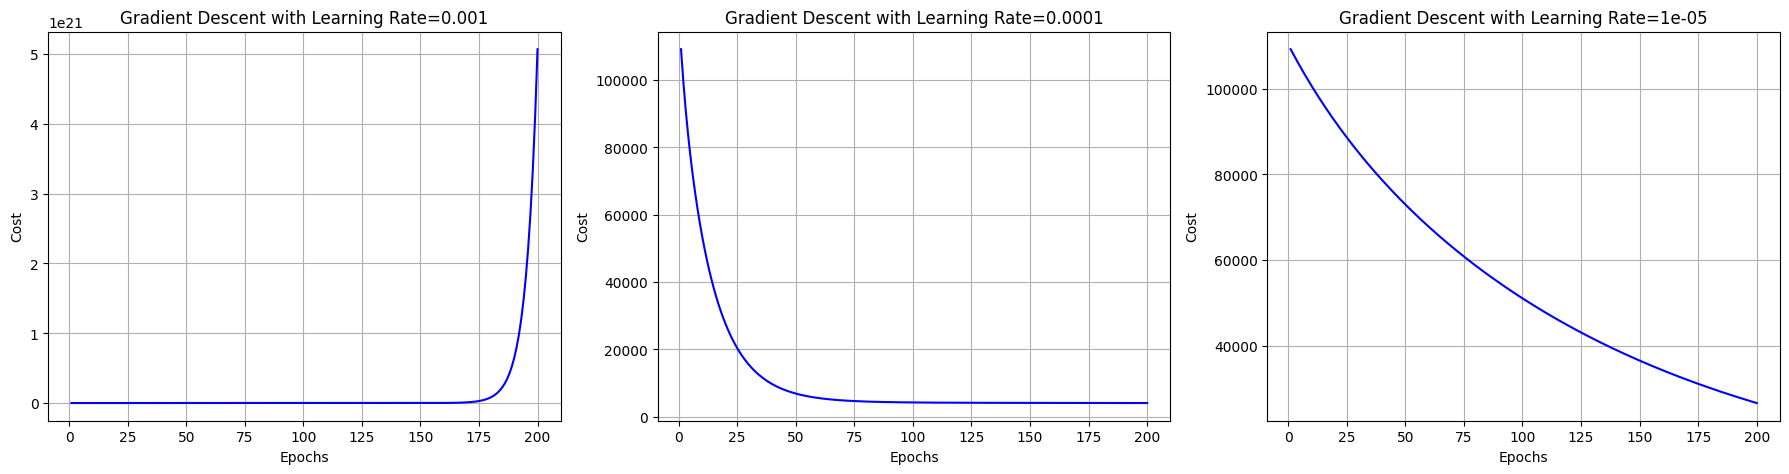

In [237]:
learning_rates = [1e-3, 1e-4, 1e-5]

# Create a figure with subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, eta in enumerate(learning_rates):
    reg_GD = GradientDescent(eta=eta, max_iter=200, random_state=42)

    # Train model
    reg_GD.fit(X_train_norm, y_train)

    axs[i].plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, color='b')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Cost')
    axs[i].set_title(f'Gradient Descent with Learning Rate={eta}')
    axs[i].grid()

plt.tight_layout()
plt.show()

Learning Rate = 1e-3:the cost initially small but then dramatically increase. This indicates the learning rate might be too high, causing the gradient descent to overshoot the minimum, resulting in divergence.

Learning Rate = 1e-4:The cost decreases quickly in the early epochs and stood at low value. The model appears to converge steadily, which is a good sign that this learning rate allows the algorithm to approach the minimum of the cost function without overshooting.

Learning Rate = 1e-5:The cost decreases steadily but at a slower rate compared to the learning rate of 1e-4. It hasn't flattened completely, which suggests that the learning rate might be too slow for fast convergence.

=> Based on the analysis above, 1e-4 is the most suitable learning rate for this model.

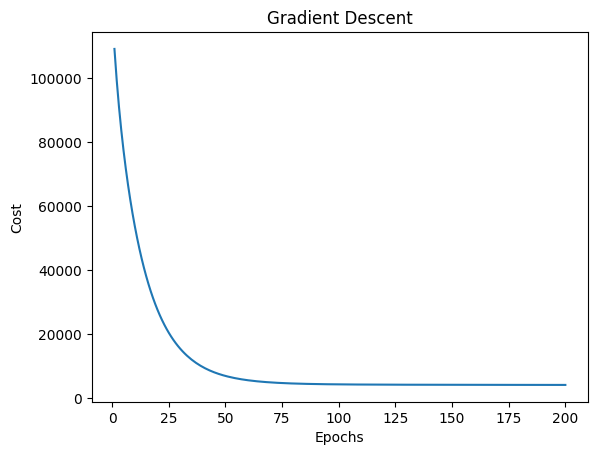

In [238]:
# Initalize the GD model
reg_GD = GradientDescent( eta = 1e-4, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [239]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42, learning_rate ='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [240]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm,y_train)

LinearRegression()

### Algorithms Comparisons

In [241]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [242]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [243]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [244]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [245]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [246]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [247]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [248]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [249]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).'

R-squared values range from 0 to 1. The more the value of the r-square near 1, the better the model is.

Mathematical Representation:
The value is calculated as:



$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$
Where:

$$ SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$ (Residual Sum of Squares) is the sum of the squares of the residuals (differences between the observed and predicted values).

Where y_i is the actual value, and ŷ_i is the predicted value from the model.

$$ SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$
(Total Sum of Squares) is the total variation in the dependent variable, calculated as the sum of the squares of the differences between the observed values and the mean of the observed values

Where ȳ is the mean of  observed data.













